In [1]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from struct import unpack
from sklearn.linear_model import LogisticRegression
from phe import paillier
import time

In [2]:
def load_mnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [3]:
def score_classifier(classifier, test_img, test_lbl, title):
    score = classifier.score(test_img, test_lbl)
    predictions = classifier.predict(test_img)
    
    cm = metrics.confusion_matrix(test_lbl, predictions)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(9,9))
    sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Model {0} \n Accuracy Score: {1:.4f}'.format(title, score) 
    plt.title(all_sample_title, size = 15)
    plt.savefig('model_cm_{0}.png'.format(title))
    
    return score, predictions, cm, cm_normalized

In [4]:
def distribute_data(train_img, train_lbl, test_img, test_lbl):
    party_0 = []
    party_0.append(train_img[:1200])
    party_0.append(train_lbl[:1200])
    party_0.append(test_img[:200])
    party_0.append(test_lbl[:200])


    party_1 = []
    party_1.append(train_img[30000:])
    party_1.append(train_lbl[30000:])
    party_1.append(test_img[5000:])
    party_1.append(test_lbl[5000:])
    
    party_2 = []
    party_2.append(train_img[3000:])
    party_2.append(train_lbl[3000:])
    party_2.append(test_img[500:])
    party_2.append(test_lbl[500:])

    party_3 = []
    party_3.append(train_img[1200:2400])
    party_3.append(train_lbl[1200:2400])
    party_3.append(test_img[200:400])
    party_3.append(test_lbl[200:400])

    party_4 = []
    party_4.append(train_img[12000:24000])
    party_4.append(train_lbl[12000:24000])
    party_4.append(test_img[2000:4000])
    party_4.append(test_lbl[2000:4000])

    party_5 = []
    party_5.append(train_img[300:])
    party_5.append(train_lbl[300:])
    party_5.append(test_img[50:])
    party_5.append(test_lbl[50:])

    
    return (party_0, party_1, party_2, party_3, party_4, party_5)

In [5]:
def generate_keypair(n_length = 512):
    public_key, private_key = paillier.generate_paillier_keypair(n_length=n_length)

    return public_key, private_key

In [6]:
train_img, train_lbl = load_mnist('data/train-images-idx3-ubyte'
                                 , 'data/train-labels-idx1-ubyte')
test_img, test_lbl = load_mnist('data/t10k-images-idx3-ubyte'
                               , 'data/t10k-labels-idx1-ubyte')

# Base Model

In [7]:
classifier_lr_base_t0 = time.time()

In [8]:
classifier_lr_base = LogisticRegression(random_state = 0, solver = 'lbfgs')

In [9]:
classifier_lr_base_t1 = time.time()

In [10]:
classifier_lr_base.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
classifier_lr_base_t2 = time.time()

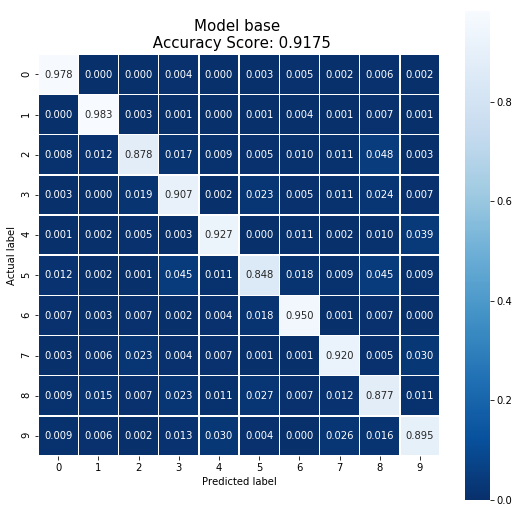

In [12]:
score_base, predictions_base, cm_base, cm_normalized_base = score_classifier(classifier_lr_base, test_img, test_lbl, 'base')

# Federated Learning

In [13]:
distribute_data_t0 = time.time()

In [14]:
party_0, party_1, party_2, party_3, party_4, party_5 = distribute_data(train_img, train_lbl, test_img, test_lbl)

In [15]:
distribute_data_t1 = time.time()

In [16]:
public_key_0, private_key_0 = generate_keypair()

In [17]:
train_img_0 = party_0[0]
train_lbl_0 = party_0[1]
test_img_0 = party_0[2]
test_lbl_0 = party_0[3]

In [18]:
classifier_lr_0_t0 = time.time()

In [19]:
classifier_lr_0 = LogisticRegression(random_state = 0, solver = 'lbfgs')

In [20]:
classifier_lr_0_t1 = time.time()

In [21]:
classifier_lr_1 = classifier_lr_0
classifier_lr_2 = classifier_lr_0
classifier_lr_3 = classifier_lr_0
classifier_lr_4 = classifier_lr_0
classifier_lr_5 = classifier_lr_0

In [22]:
classifier_lr_0_t2 = time.time()

In [23]:
classifier_lr_0.fit(train_img_0, train_lbl_0)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
classifier_lr_0_t3 = time.time()

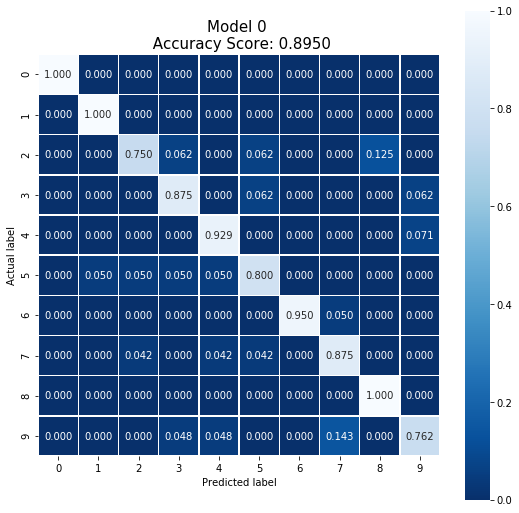

In [25]:
score_0, predictions_0, cm_0, cm_normalized_0 = score_classifier(classifier_lr_0, test_img_0, test_lbl_0,  '0')

In [26]:
classifier_lr_0_t4 = time.time()

In [27]:
coef_weight_0 = classifier_lr_0.coef_[0]

In [28]:
coef_bias_0 = classifier_lr_0.coef_[1]

In [29]:
coef_weight_encrypt_0 = []
coef_bias_encrypt_0 = []

for value in coef_weight_0:
    coef_weight_encrypt_0.append(public_key_0.encrypt(value, precision=7))
    
for value in coef_bias_0:
    coef_bias_encrypt_0.append(public_key_0.encrypt(value, precision=7))

    
coef_weight_encrypt_0 = np.asarray(coef_weight_encrypt_0)
coef_bias_encrypt_0 = np.asarray(coef_bias_encrypt_0)

In [30]:
classifier_lr_0_t5 = time.time()

Party 0 transfers 'coef_encrypt_0' to Party 1, 2, 3, 4, 5

# Party 1

In [31]:
train_img_1 = party_1[0]
train_lbl_1 = party_1[1]
test_img_1 = party_1[2]
test_lbl_1 = party_1[3]

In [32]:
classifier_lr_1_t0 = time.time()

In [33]:
classifier_lr_1.fit(train_img_1, train_lbl_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
classifier_lr_1_t1 = time.time()

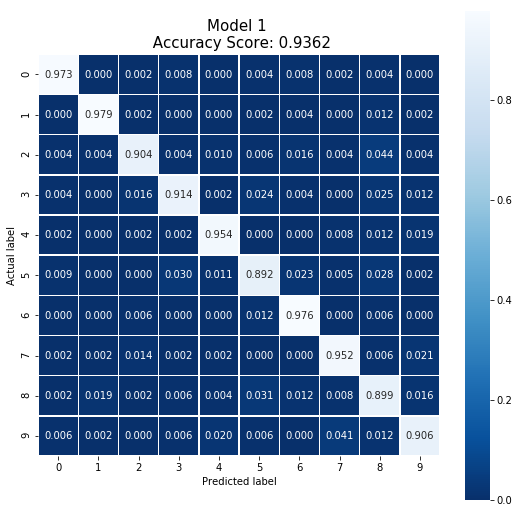

In [35]:
score_1, predictions_1, cm_1, cm_normalized_1 = score_classifier(classifier_lr_1, test_img_1, test_lbl_1, '1')

In [36]:
classifier_lr_1_t2 = time.time()

In [37]:
coef_weight_1 = classifier_lr_1.coef_[0]
coef_bias_1 = classifier_lr_1.coef_[1]

In [38]:
coef_weight_encrypt_01 = coef_weight_1 + coef_weight_encrypt_0
coef_bias_encrypt_01 = coef_bias_1 + coef_bias_encrypt_0

In [39]:
coef_weight_encrypt_01_average = coef_weight_encrypt_01 / 2
coef_bias_encrypt_01_average = coef_bias_encrypt_01 / 2

In [40]:
classifier_lr_1_t3 = time.time()

Party 1 transfers 'coef_encrypt_0' back to Party 0

In [41]:
coef_weight_decrypt_01 = []
coef_bias_decrypt_01 = []


for value in coef_weight_encrypt_01_average:
    coef_weight_decrypt_01.append(private_key_0.decrypt(value))
    
for value in coef_bias_encrypt_01_average:
    coef_bias_decrypt_01.append(private_key_0.decrypt(value))

    
coef_weight_decrypt_01 = np.asarray(coef_weight_decrypt_01)
coef_bias_decrypt_01 = np.asarray(coef_bias_decrypt_01)

In [42]:
classifier_lr_0.coef_[0] = coef_weight_decrypt_01
classifier_lr_0.coef_[1] = coef_bias_decrypt_01

In [43]:
classifier_lr_1_t4 = time.time()

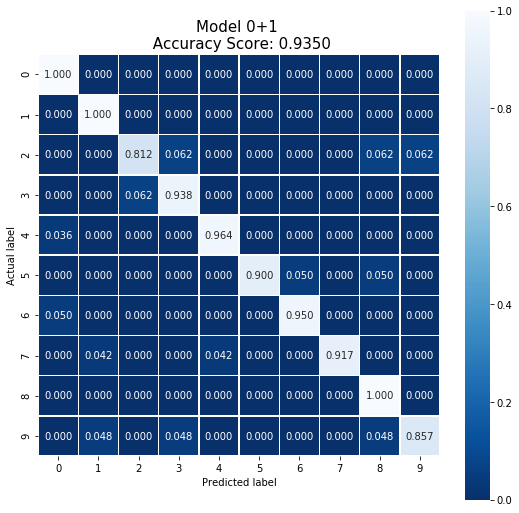

In [44]:
score_01, predictions_01, cm_01, cm_normalized_01 = score_classifier(classifier_lr_0, test_img_0, test_lbl_0, '0+1')

# Party 2

In [45]:
train_img_2 = party_2[0]
train_lbl_2 = party_2[1]
test_img_2 = party_2[2]
test_lbl_2 = party_2[3]

In [46]:
classifier_lr_2_t0 = time.time()

In [47]:
classifier_lr_2.fit(train_img_2, train_lbl_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
classifier_lr_2_t1 = time.time()

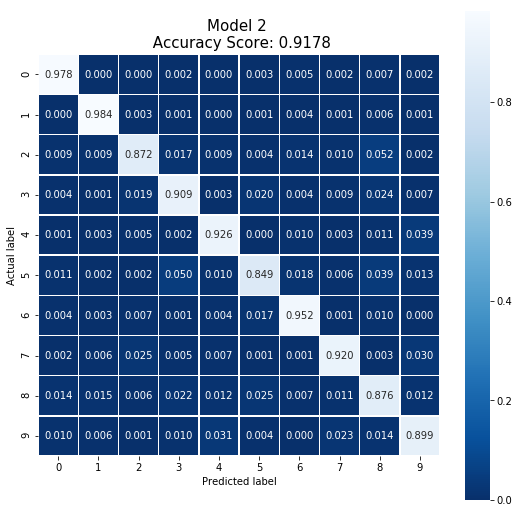

In [49]:
score_2, predictions_2, cm_2, cm_normalized_2 = score_classifier(classifier_lr_2, test_img_2, test_lbl_2, '2')

In [50]:
classifier_lr_2_t2 = time.time()

In [51]:
coef_weight_2 = classifier_lr_2.coef_[0]
coef_bias_2 = classifier_lr_2.coef_[1]

In [52]:
coef_weight_encrypt_02 = coef_weight_2 + coef_weight_encrypt_0
coef_bias_encrypt_02 = coef_bias_2 + coef_bias_encrypt_0

In [53]:
coef_weight_encrypt_02_average = coef_weight_encrypt_02 / 2
coef_bias_encrypt_02_average = coef_bias_encrypt_02 / 2

In [54]:
classifier_lr_2_t3 = time.time()

Party 2 transfers 'coef_encrypt_0' back to Party 0

In [55]:
coef_weight_decrypt_02 = []
coef_bias_decrypt_02 = []


for value in coef_weight_encrypt_02_average:
    coef_weight_decrypt_02.append(private_key_0.decrypt(value))
    
for value in coef_bias_encrypt_02_average:
    coef_bias_decrypt_02.append(private_key_0.decrypt(value))

    
coef_weight_decrypt_02 = np.asarray(coef_weight_decrypt_02)
coef_bias_decrypt_02 = np.asarray(coef_bias_decrypt_02)

In [56]:
classifier_lr_0.coef_[0] = coef_weight_decrypt_02
classifier_lr_0.coef_[1] = coef_bias_decrypt_02

In [57]:
classifier_lr_2_t4 = time.time()

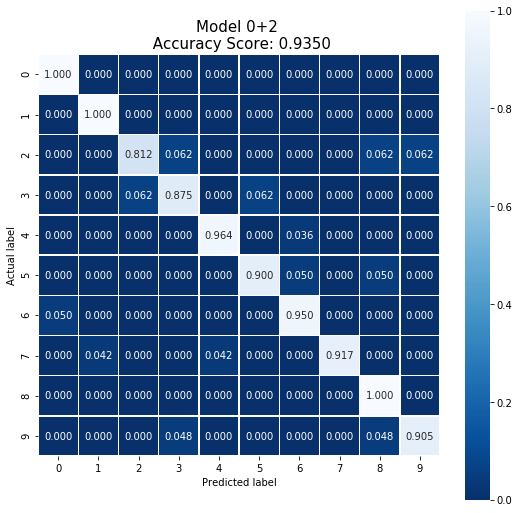

In [58]:
score_02, predictions_02, cm_02, cm_normalized_02 = score_classifier(classifier_lr_0, test_img_0, test_lbl_0, '0+2')

# Party 3

In [59]:
train_img_3 = party_3[0]
train_lbl_3 = party_3[1]
test_img_3 = party_3[2]
test_lbl_3 = party_3[3]

In [60]:
classifier_lr_3_t0 = time.time()

In [61]:
classifier_lr_3.fit(train_img_3, train_lbl_3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
classifier_lr_3_t1 = time.time()

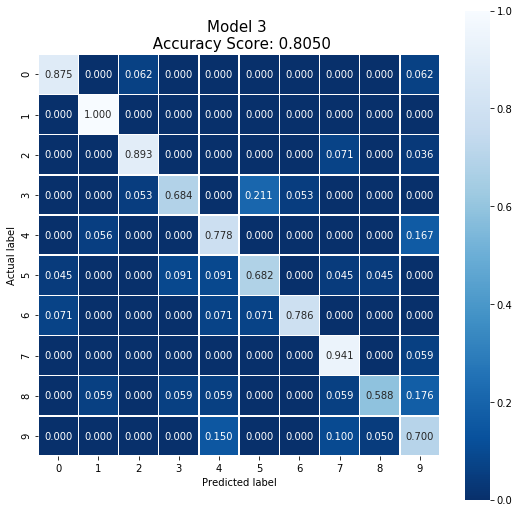

In [63]:
score_3, predictions_3, cm_3, cm_normalized_3 = score_classifier(classifier_lr_3, test_img_3, test_lbl_3, '3')

In [64]:
classifier_lr_3_t2 = time.time()

In [65]:
coef_weight_3 = classifier_lr_3.coef_[0]
coef_bias_3 = classifier_lr_3.coef_[1]

In [66]:
coef_weight_encrypt_03 = coef_weight_3 + coef_weight_encrypt_0
coef_bias_encrypt_03 = coef_bias_3 + coef_bias_encrypt_0

In [67]:
coef_weight_encrypt_03_average = coef_weight_encrypt_03 / 2
coef_bias_encrypt_03_average = coef_bias_encrypt_03 / 2

In [68]:
classifier_lr_3_t3 = time.time()

Party 3 transfers 'coef_encrypt_0' back to Party 0

In [69]:
coef_weight_decrypt_03 = []
coef_bias_decrypt_03 = []


for value in coef_weight_encrypt_03_average:
    coef_weight_decrypt_03.append(private_key_0.decrypt(value))
    
for value in coef_bias_encrypt_03_average:
    coef_bias_decrypt_03.append(private_key_0.decrypt(value))

    
coef_weight_decrypt_03 = np.asarray(coef_weight_decrypt_03)
coef_bias_decrypt_03 = np.asarray(coef_bias_decrypt_03)

In [70]:
classifier_lr_0.coef_[0] = coef_weight_decrypt_03
classifier_lr_0.coef_[1] = coef_bias_decrypt_03

In [71]:
classifier_lr_3_t4 = time.time()

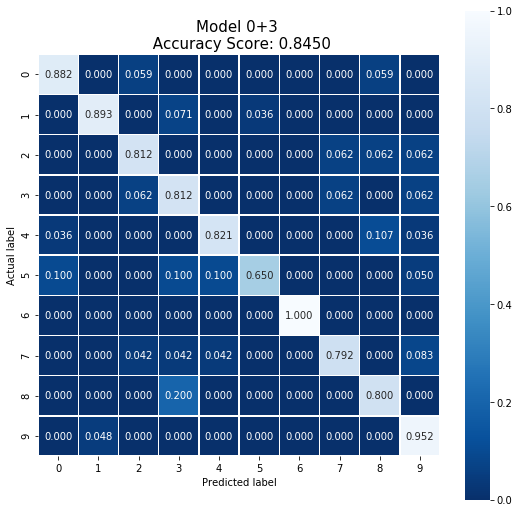

In [72]:
score_03, predictions_03, cm_03, cm_normalized_03 = score_classifier(classifier_lr_0, test_img_0, test_lbl_0, '0+3')

# Party 4

In [73]:
train_img_4 = party_4[0]
train_lbl_4 = party_4[1]
test_img_4 = party_4[2]
test_lbl_4 = party_4[3]

In [74]:
classifier_lr_4_t0 = time.time()

In [75]:
classifier_lr_4.fit(train_img_4, train_lbl_4)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
classifier_lr_4_t1 = time.time()

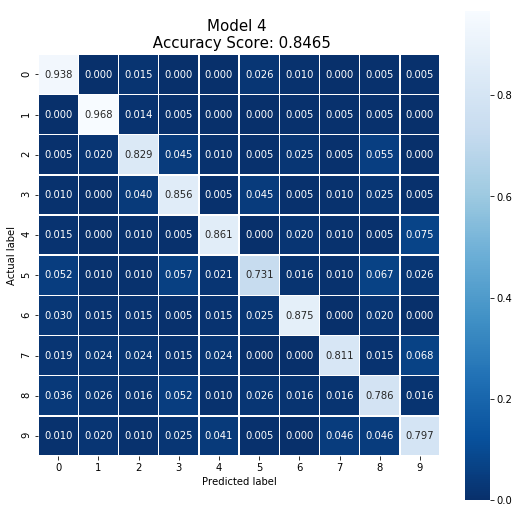

In [77]:
score_4, predictions_4, cm_4, cm_normalized_4 = score_classifier(classifier_lr_4, test_img_4, test_lbl_4, '4')

In [78]:
classifier_lr_4_t2 = time.time()

In [79]:
coef_weight_4 = classifier_lr_4.coef_[0]
coef_bias_4 = classifier_lr_4.coef_[1]

In [80]:
coef_weight_encrypt_04 = coef_weight_4 + coef_weight_encrypt_0
coef_bias_encrypt_04 = coef_bias_4 + coef_bias_encrypt_0

In [81]:
coef_weight_encrypt_04_average = coef_weight_encrypt_04 / 2
coef_bias_encrypt_04_average = coef_bias_encrypt_04 / 2

In [82]:
classifier_lr_4_t3 = time.time()

Party 3 transfers 'coef_encrypt_0' back to Party 0

In [83]:
coef_weight_decrypt_04 = []
coef_bias_decrypt_04 = []


for value in coef_weight_encrypt_04_average:
    coef_weight_decrypt_04.append(private_key_0.decrypt(value))
    
for value in coef_bias_encrypt_04_average:
    coef_bias_decrypt_04.append(private_key_0.decrypt(value))

    
coef_weight_decrypt_04 = np.asarray(coef_weight_decrypt_04)
coef_bias_decrypt_04 = np.asarray(coef_bias_decrypt_04)

In [84]:
classifier_lr_0.coef_[0] = coef_weight_decrypt_04
classifier_lr_0.coef_[1] = coef_bias_decrypt_04

In [85]:
classifier_lr_4_t4 = time.time()

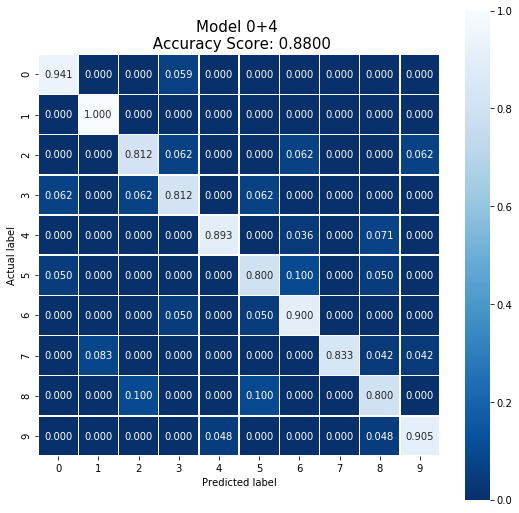

In [86]:
score_04, predictions_04, cm_04, cm_normalized_04 = score_classifier(classifier_lr_0, test_img_0, test_lbl_0, '0+4')

# Party 5

In [87]:
train_img_5 = party_5[0]
train_lbl_5 = party_5[1]
test_img_5 = party_5[2]
test_lbl_5 = party_5[3]

In [88]:
classifier_lr_5_t0 = time.time()

In [89]:
classifier_lr_5.fit(train_img_5, train_lbl_5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
classifier_lr_5_t1 = time.time()

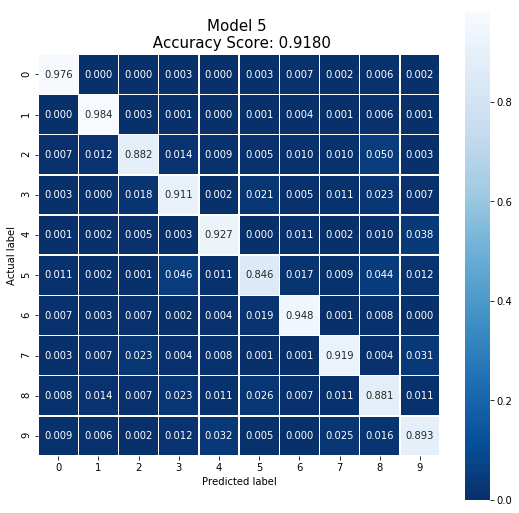

In [91]:
score_5, predictions_5, cm_5, cm_normalized_5 = score_classifier(classifier_lr_5, test_img_5, test_lbl_5, '5')

In [92]:
classifier_lr_5_t2 = time.time()

In [93]:
coef_weight_5 = classifier_lr_5.coef_[0]
coef_bias_5 = classifier_lr_5.coef_[1]

In [94]:
coef_weight_encrypt_05 = coef_weight_5 + coef_weight_encrypt_0
coef_bias_encrypt_05 = coef_bias_5 + coef_bias_encrypt_0

In [95]:
coef_weight_encrypt_05_average = coef_weight_encrypt_05 / 2
coef_bias_encrypt_05_average = coef_bias_encrypt_05 / 2

In [96]:
classifier_lr_5_t3 = time.time()

Party 5 transfers 'coef_encrypt_0' back to Party 0

In [97]:
coef_weight_decrypt_05 = []
coef_bias_decrypt_05 = []


for value in coef_weight_encrypt_05_average:
    coef_weight_decrypt_05.append(private_key_0.decrypt(value))
    
for value in coef_bias_encrypt_05_average:
    coef_bias_decrypt_05.append(private_key_0.decrypt(value))

    
coef_weight_decrypt_05 = np.asarray(coef_weight_decrypt_05)
coef_bias_decrypt_05 = np.asarray(coef_bias_decrypt_05)

In [98]:
classifier_lr_0.coef_[0] = coef_weight_decrypt_05
classifier_lr_0.coef_[1] = coef_bias_decrypt_05

In [99]:
classifier_lr_5_t4 = time.time()

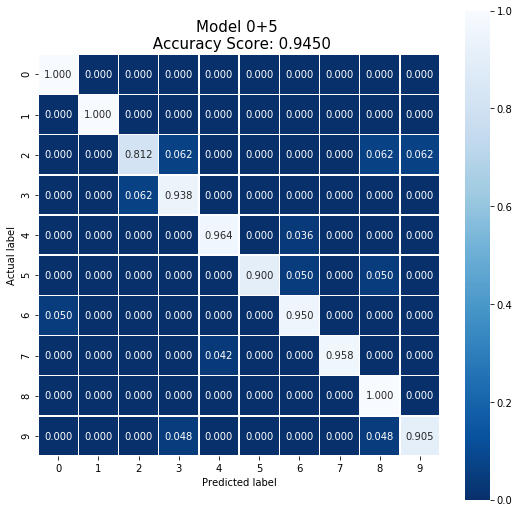

In [100]:
score_05, predictions_05, cm_05, cm_normalized_05 = score_classifier(classifier_lr_0, test_img_0, test_lbl_0, '0+5')

# Federated

In [101]:
classifier_lr_federated_t0 = time.time()

In [102]:
coef_weight_encrypt_federated = coef_weight_encrypt_01 + coef_weight_encrypt_02 + coef_weight_encrypt_03 + coef_weight_encrypt_04 + coef_weight_encrypt_05
coef_bias_encrypt_federated = coef_bias_encrypt_01 + coef_bias_encrypt_02 + coef_bias_encrypt_03 + coef_bias_encrypt_04 + coef_bias_encrypt_05

In [103]:
federated_count = 5
coef_weight_encrypt_federated_average = coef_weight_encrypt_federated / (federated_count * 2)
coef_bias_encrypt_federated_average = coef_bias_encrypt_federated / (federated_count * 2)

In [104]:
classifier_lr_federated_t1 = time.time()

In [105]:
coef_weight_decrypt_federated = []
coef_bias_decrypt_federated = []


for value in coef_weight_encrypt_federated_average:
    coef_weight_decrypt_federated.append(private_key_0.decrypt(value))
    
for value in coef_bias_encrypt_federated_average:
    coef_bias_decrypt_federated.append(private_key_0.decrypt(value))

    
coef_weight_decrypt_federated = np.asarray(coef_weight_decrypt_federated)
coef_bias_decrypt_federated = np.asarray(coef_bias_decrypt_federated)

In [106]:
classifier_lr_0.coef_[0] = coef_weight_decrypt_federated
classifier_lr_0.coef_[1] = coef_bias_decrypt_federated

In [107]:
classifier_lr_federated_t2 = time.time()

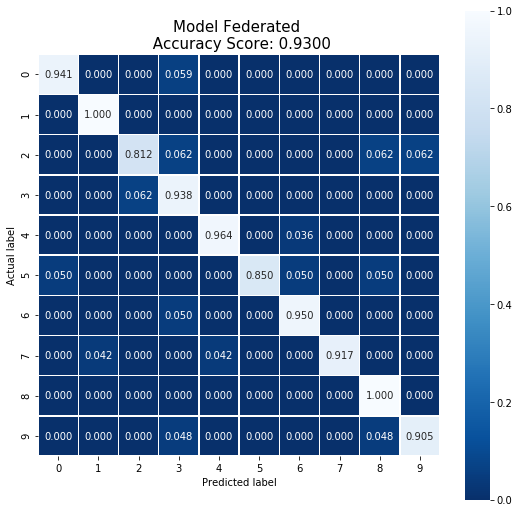

In [108]:
score_federated, predictions_federated, cm_federated, cm_normalized_federated = score_classifier(classifier_lr_0, test_img_0, test_lbl_0, 'Federated')

In [119]:
time_base_lr = classifier_lr_base_t1 - classifier_lr_base_t0
time_base_lr_train = classifier_lr_base_t2 - classifier_lr_base_t1

print(time_base_lr)
print(time_base_lr_train)

0.015386104583740234
54.80650281906128


In [120]:
time_distribute_data = distribute_data_t1 - distribute_data_t0

print(time_distribute_data)

0.011879920959472656


In [121]:
time_classifier_lr_0 = classifier_lr_0_t1 - classifier_lr_0_t0
time_classifier_lr_0_train = classifier_lr_0_t3 - classifier_lr_0_t2
time_classifier_lr_0_encrypt = classifier_lr_0_t5 - classifier_lr_0_t4

print(time_classifier_lr_0)
print(time_classifier_lr_0_train)
print(time_classifier_lr_0_encrypt)

0.00839090347290039
1.0592451095581055
0.6803622245788574


In [122]:
time_classifier_lr_1_train = classifier_lr_1_t1 - classifier_lr_1_t0
time_classifier_lr_1_encrypt = classifier_lr_1_t3 - classifier_lr_1_t2
time_classifier_lr_1_decrypt = classifier_lr_1_t4 - classifier_lr_1_t3

print(time_classifier_lr_1_train)
print(time_classifier_lr_1_encrypt)
print(time_classifier_lr_1_decrypt)

28.900470733642578
0.15448999404907227
0.15977096557617188


In [123]:
time_classifier_lr_2_train = classifier_lr_2_t1 - classifier_lr_2_t0
time_classifier_lr_2_encrypt = classifier_lr_2_t3 - classifier_lr_2_t2
time_classifier_lr_2_decrypt = classifier_lr_2_t4 - classifier_lr_2_t3

print(time_classifier_lr_2_train)
print(time_classifier_lr_2_encrypt)
print(time_classifier_lr_2_decrypt)

54.20741605758667
0.17840814590454102
0.1614079475402832


In [124]:
time_classifier_lr_3_train = classifier_lr_3_t1 - classifier_lr_3_t0
time_classifier_lr_3_encrypt = classifier_lr_3_t3 - classifier_lr_3_t2
time_classifier_lr_3_decrypt = classifier_lr_3_t4 - classifier_lr_3_t3

print(time_classifier_lr_3_train)
print(time_classifier_lr_3_encrypt)
print(time_classifier_lr_3_decrypt)

1.088592767715454
0.23986315727233887
0.14871478080749512


In [125]:
time_classifier_lr_4_train = classifier_lr_4_t1 - classifier_lr_4_t0
time_classifier_lr_4_encrypt = classifier_lr_4_t3 - classifier_lr_4_t2
time_classifier_lr_4_decrypt = classifier_lr_4_t4 - classifier_lr_4_t3

print(time_classifier_lr_4_train)
print(time_classifier_lr_4_encrypt)
print(time_classifier_lr_4_decrypt)

9.636973142623901
0.14260125160217285
0.13969182968139648


In [126]:
time_classifier_lr_5_train = classifier_lr_5_t1 - classifier_lr_5_t0
time_classifier_lr_5_encrypt = classifier_lr_5_t3 - classifier_lr_5_t2
time_classifier_lr_5_decrypt = classifier_lr_5_t4 - classifier_lr_5_t3

print(time_classifier_lr_5_train)
print(time_classifier_lr_5_encrypt)
print(time_classifier_lr_5_decrypt)

53.36509299278259
0.1492161750793457
0.15021491050720215


In [127]:
time_classifier_lr_federated_encrypt = classifier_lr_federated_t1 - classifier_lr_federated_t0
time_classifier_lr_federated_decrypt = classifier_lr_federated_t2 - classifier_lr_federated_t1

print(time_classifier_lr_federated_encrypt)
print(time_classifier_lr_federated_decrypt)

0.16599321365356445
0.15738797187805176
